In [30]:
from matplotlib import pyplot as plt 
import numpy as np 
from math import sin, cos
from scipy.optimize import fsolve


# РЕШЕНИЕ СИСТЕМ НЕЛИНЕЙНЫХ УРАВНЕНИЙ


## Вариант 24 

Решить следующую систему  с точностью $ \varepsilon = 10^{-6} $ :
$$ f_1(x_1,x_2) = 0 $$
$$ f_2(x_1,x_2) = 0 $$

В моем варианте: 
$$ sin(x_1 + x_2) - x1 + 0.1=0 $$
$$ x_2 - cos(3x_1) + 0.1=0 $$



### Локализация корней 

Локализуем корни графически. 
Для этого будем использовать спасительные функции матплотлиба contour. 
Обратим внимание, что функции cos(x), sin(x) могут принимать значения только из отрезка [-1; 1]. На основании этого делаем следующие выводы: 
$$ x_1 \in [-0.9; 1.1]$$
$$ x_2 \in [-1.1; 0.9]$$

In [2]:
x1 = np.linspace(-0.9, 1.1, 100)
x2 = np.linspace(-1.1, 0.9, 100)
X1, X2 = np.meshgrid(x1,x2)
Z1 = np.sin(X1+X2)-X1+0.1
Z2 = X2-np.cos(3*X1)+0.1

Text(0, 0.5, 'x2')

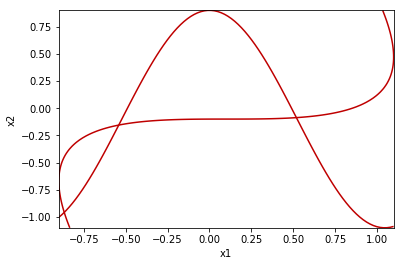

In [3]:
plt.contour(X1, X2, Z1,levels=0,cmap = 'gist_heat_r' )
plt.contour(X1, X2, Z2, levels = 0,cmap = 'gist_heat_r')
plt.xlabel("x1")
plt.ylabel("x2")

На графике изображены линии уровня функций $f_1(x_1,x_2)$ и $f_2(x_1,x_2)$ со значением ноль. 
Точки пересечения линий - это решения системы уравнений.
По графику видно, что система имеет три решения. 
Выберем следующие начальные приближения $(x_1,x_2)$:

Первый корень: $\overline{x^{(0)}}   = (-0.8; -1)$

Второй корень: $\overline{x^{(0)}}= (-0.5; -0.25)$

Третий корень: $\overline{x^{(0)}} = (0.55; -0.2)$

### Метод Ньютона. 
В нашем случае дана двумерная задача. 

Постановка задачи в векторном виде: $\overline{f}(\overline{x})=\overline{0}$, где $\overline{f} = (f_1, f_2)^T \in \mathbb{R}^2 $, $\overline{x} = (x_1, x_2)^T \in \mathbb{R}^2 $

Метод Ньютона решения систем нелинейных уравнений  основан на идее линеаризации. Выбирается начальное приближение $\overline{x^{(0)}}$ и строится линейная аппроксимация. 

Пусть $\overline{x}$ - истинное решение системы. 
Пусть построено приближение для $ \overline{x^{(k)}}$, k=0,1,2... :

$$ f_i(\overline{x}) \approx f_i(\overline{x}^{(k)}) + \frac{df_i( \overline{x}^{(k)})}{dx_1}(\overline{x} -\overline{x}^{(k)} ) + \frac{df_i( \overline{x}^{(k)})}{dx_2}(\overline{x} -\overline{x}^{(k)} )=\overline{0}, \space i=1,2 $$

В матричном виде: 
$$ \overline{f}(\overline{x}^{(k)}) + \overline{f}'(\overline{x}^{(k)})(\overline{x} -\overline{x}^{(k)})=\overline{0}$$ 
где $ \overline{f}'(\overline{x}^{(k)}) $ - Матрица Якоби.

Положим $ \overline{x}^{(k+1)}$ вместо $\overline{x}$:
$$ \overline{f}(\overline{x}^{(k)}) + \overline{f}'(\overline{x}^{(k)})(\overline{x}^{(k+1)} -\overline{x}^{(k)})=\overline{0}$$ 



$$ \overline{x}^{(k+1)} = \overline{x}^{(k)} - (\overline{f}'(\overline{x}^{(k)}))^{-1}f(\overline{x}^{(k)})   $$ 


Так как поиск   $(\overline{f}'(\overline{x}^{(k)}))^{-1}$, обратной матрицы Якоби, - затратная по вычислениям операция вводят $  \overline{x}^{(k+1)} =  \overline{x}^{(k)} + \Delta  \overline{x}^{(k)}$, на чем и основаны итерации метода Ньютона.
$$ \overline{f}'(\overline{x}^{(k)}) \Delta  \overline{x}^{(k)} = - \overline{f}(\overline{x}^{(k)}) \space \space \space(*) $$
$\Delta  \overline{x}^{(k)}$  является решением системы $(*)$.

Метод Ньютона обладает квадратичной сходимостью. 
Критерий окончания: 
$$ ||\overline{x}^{(k+1)}  - \overline{x}^{(k)}  || < \varepsilon $$
$$ ||\Delta  \overline{x}^{(k)} || < \varepsilon $$

Матрица Якоби: 

$$ \begin{pmatrix}
cos(x_1+x_2)-1 &  cos(x_1+x_2)\\
3sin(3x_1) & 1 \end{pmatrix} $$

#### Реализация метода Ньютона для двумерного случая. 

In [9]:
def f(x ):

    # возвращает значение вектора f(x) в точке (x1,x2)
    
    return [sin(x[0]+x[1])-x[0]+0.1, x[1]-cos(3*x[0])+0.1]

def jacobi(x):
    # возвращает матрицу Якоби в точке (x1,x2) как двумерный массив 
    return [[cos(x[0]+x[1])-1,cos(x[0]+x[1])  ], [ 3*sin(3*x[0]), 1 ] ]
    

In [31]:
def newton_method( f, jacobi, x0, eps):
    x_k = x0.copy()
    A = jacobi(x0)

    b = f(x0)
    for i in range(len(b)):
        b[i]=b[i]*(-1)

    x_k_new = np.linalg.solve(A, b) +x_k#сделали первую итерацию 
    iterations = 1 
    while(np.linalg.norm(x_k_new-x_k)>eps):
        x_k = x_k_new.copy()
        A = jacobi(x_k)

        
        b =   f(x_k)
        for i in range(len(b)):
            b[i]=b[i]*(-1)

        x_k_new = np.linalg.solve(A, b) + x_k
        iterations = iterations+1
        
    print("Число итераций: ", iterations)
    return x_k_new

#### Поиск корней. 

##### Первый корень. 

In [32]:
x1 = newton_method( f, jacobi, [-0.8, -1], 1e-6)
print("Найденное решение алгоритма: ")
print("%.4f "*len(x1) % tuple(x1) )

Число итераций:  4
Найденное решение алгоритма: 
-0.8676 -0.9584 


In [34]:
x1_scipy  = fsolve(f, [-0.8, -1], xtol=1e-6)
print("Решение, найденное благодаря scipy.optimize.fsolve:" )
print("%.4f "*len(x1_scipy) % tuple(x1_scipy) )

abs_error  =   np.linalg.norm(x1_scipy-x1, np.inf)
print("Абсолютная погрешность: ", abs_error)

Решение, найденное благодаря scipy.optimize.fsolve:
-0.8676 -0.9584 
Абсолютная погрешность:  7.156909509475895e-10


#####  Второй корень. 

In [35]:
x2 = newton_method( f, jacobi, [-0.5, -0.25], 1e-6)
print("Найденное решение алгоритма: ")
print("%.4f "*len(x2) % tuple(x2) )

Число итераций:  4
Найденное решение алгоритма: 
-0.5420 -0.1551 


In [37]:
x2_scipy  = fsolve(f,  [-0.5, -0.25], xtol=1e-6)
print("Решение, найденное благодаря scipy.optimize.fsolve:" )
print("%.4f "*len(x2_scipy) % tuple(x2_scipy) )

abs_error  =   np.linalg.norm(x2_scipy-x2, np.inf)
print("Абсолютная погрешность: ", abs_error)

Решение, найденное благодаря scipy.optimize.fsolve:
-0.5420 -0.1551 
Абсолютная погрешность:  5.057565477528669e-12


#####  Третий корень. 

In [38]:
x3 = newton_method( f, jacobi, [ 0.55, -0.2], 1e-6)
print("Найденное решение алгоритма: ")
print("%.4f "*len(x3) % tuple(x3) )

Число итераций:  3
Найденное решение алгоритма: 
0.5191 -0.0866 


In [39]:
x3_scipy  = fsolve(f,  [ 0.55, -0.2], xtol=1e-6)
print("Решение, найденное благодаря scipy.optimize.fsolve:" )
print("%.4f "*len(x3_scipy) % tuple(x3_scipy) )

abs_error  =   np.linalg.norm(x3_scipy-x3, np.inf)
print("Абсолютная погрешность: ", abs_error)

Решение, найденное благодаря scipy.optimize.fsolve:
0.5191 -0.0866 
Абсолютная погрешность:  8.884079583104665e-11


Реализованный метод Ньютона позволил вычислить все три корня, выявленные графически. Точность соответствует требуемой. 
Стоит отметить, что число итераций во всех случаях достаточно маленькое (3-4) итерации, что объясняется квадратичной скоростью сходимости. 